### Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None)


### Loading the Data

In [59]:
df = pd.read_csv("churn.csv", index_col=0)

In [60]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### EDA

In [61]:
df.shape

(10000, 13)

In [62]:
df.info() # Feature Information

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [63]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [64]:
# Categorial variable
categorical_variables = df.select_dtypes(include=["object"]).columns
list(categorical_variables)

['Surname', 'Geography', 'Gender']

In [65]:
# Numeric Variables
numeric_variables = df.select_dtypes(exclude=["object"]).columns
list(numeric_variables)

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [66]:
# Frequency of classes of dependent variable
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [67]:
# Customers leaving the bank
churn = df.loc[df["Exited"]==1]
# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]

#### Credit Score

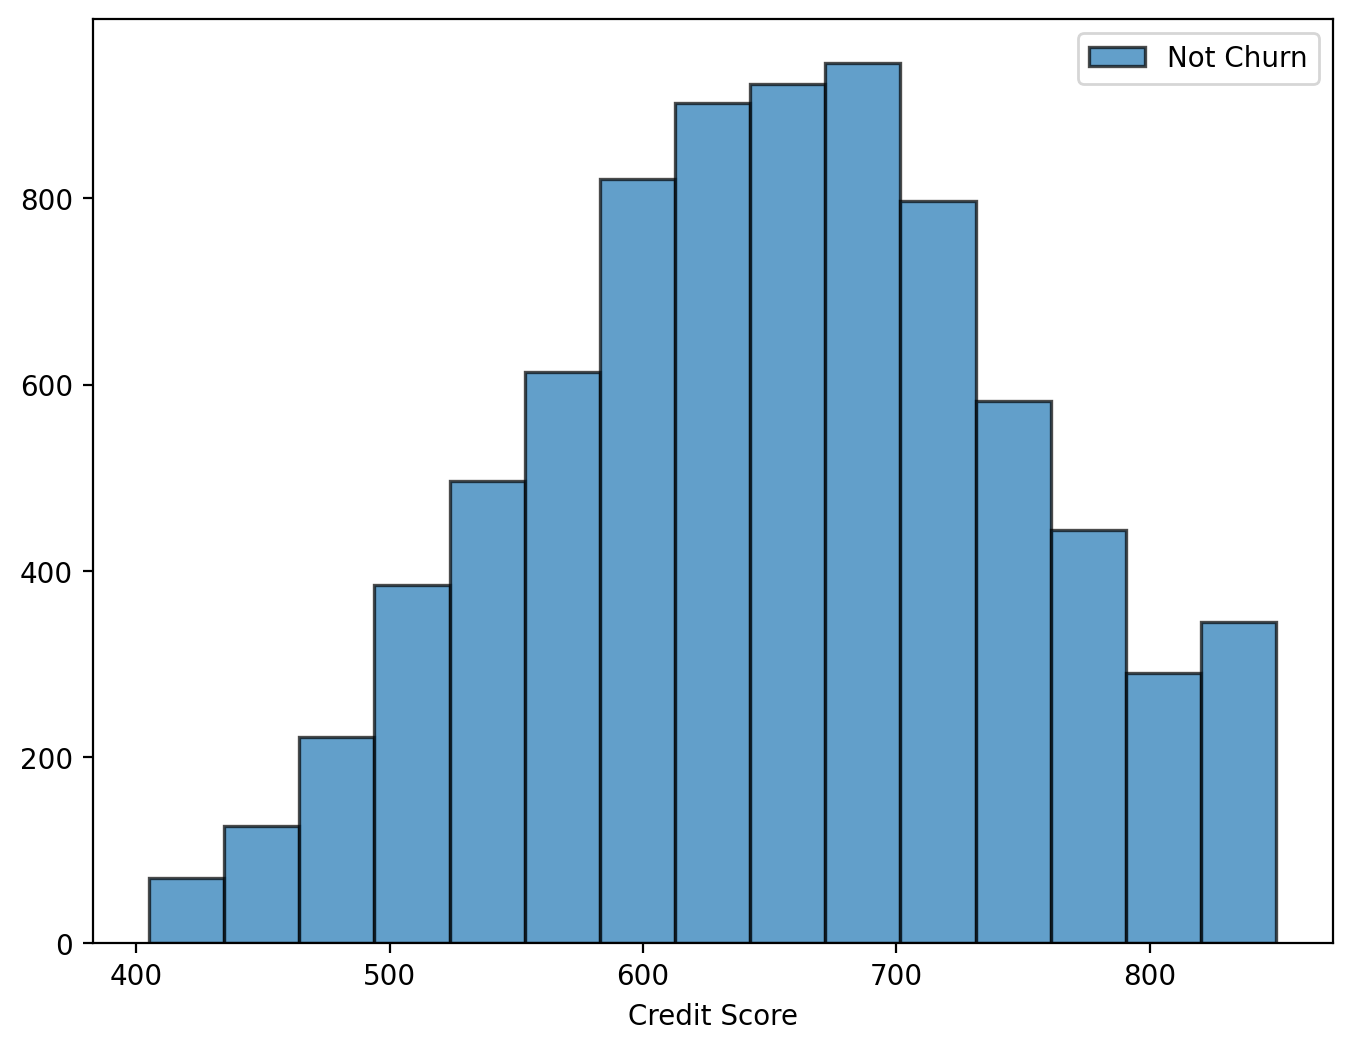

In [68]:
# Distribution of the Credit Score for not_churn
plt.figure(figsize=(8, 6))
plt.hist(not_churn["CreditScore"], bins=15, alpha=0.7, edgecolor='black', linewidth=1.2, label="Not Churn")
plt.xlabel("Credit Score")
plt.legend()
plt.show()

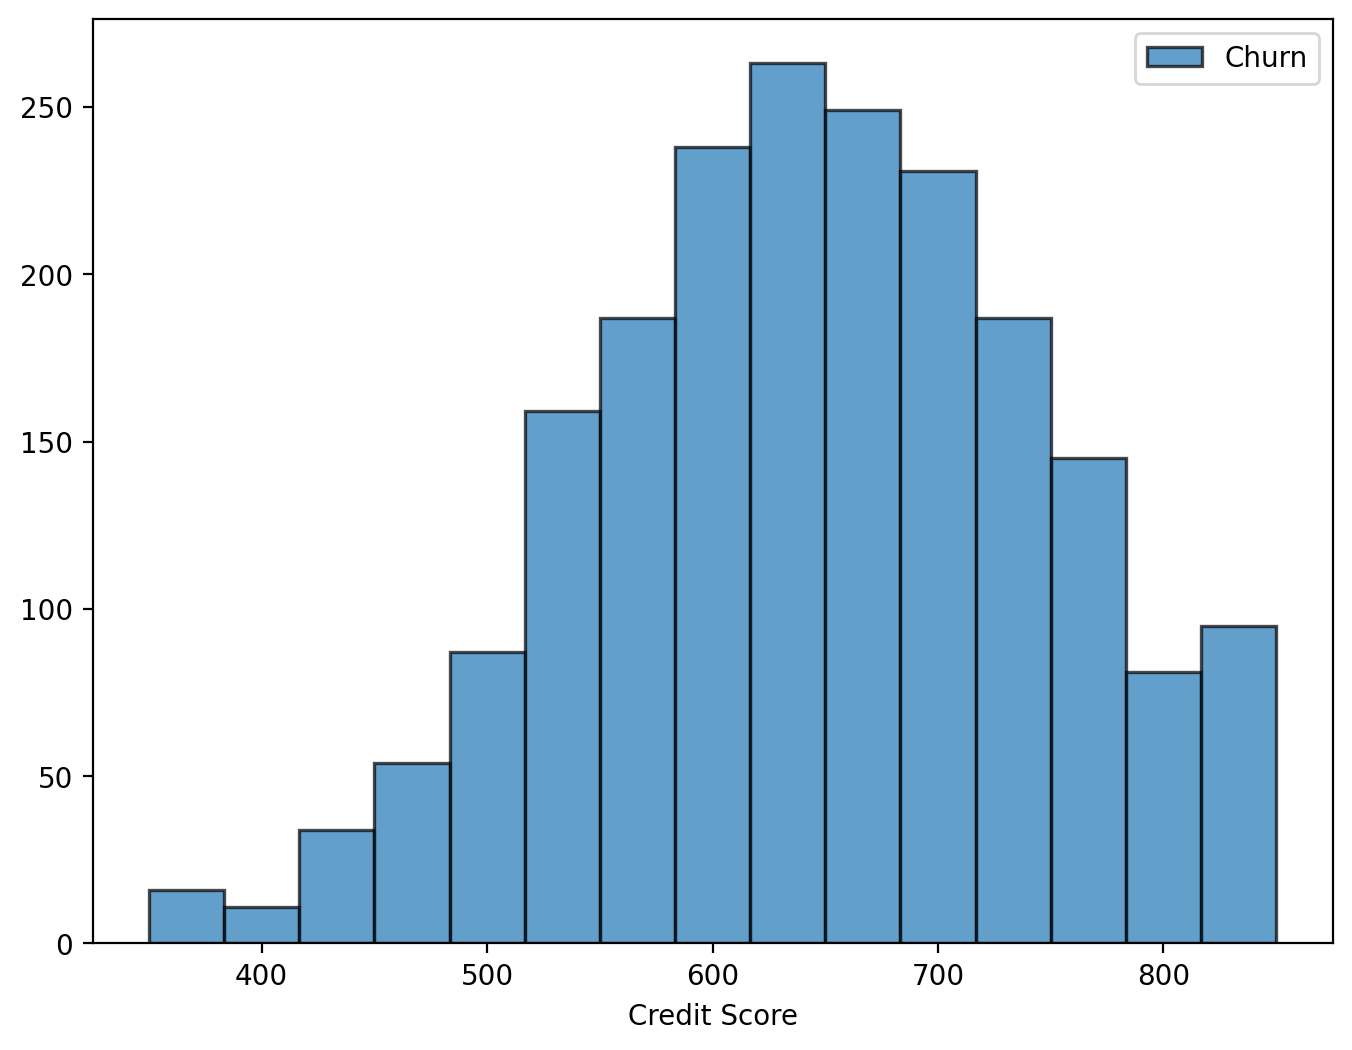

In [69]:
# Distribution of the Credit Score for churn
plt.figure(figsize=(8, 6))
plt.hist(churn["CreditScore"], bins=15, alpha=0.7, edgecolor='black', linewidth=1.2, label="Churn")
plt.xlabel("Credit Score")
plt.legend()
plt.show()

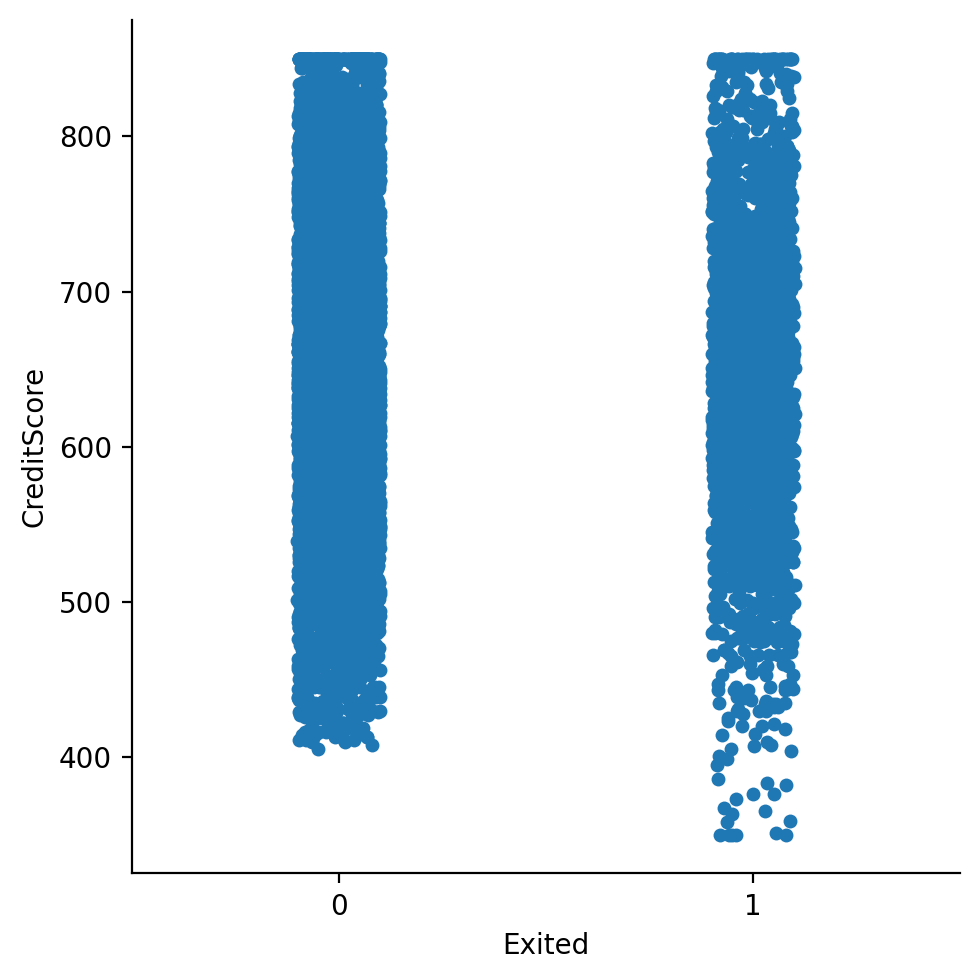

In [70]:
sns.catplot(data=df, x="Exited", y="CreditScore")
plt.show()

### Age

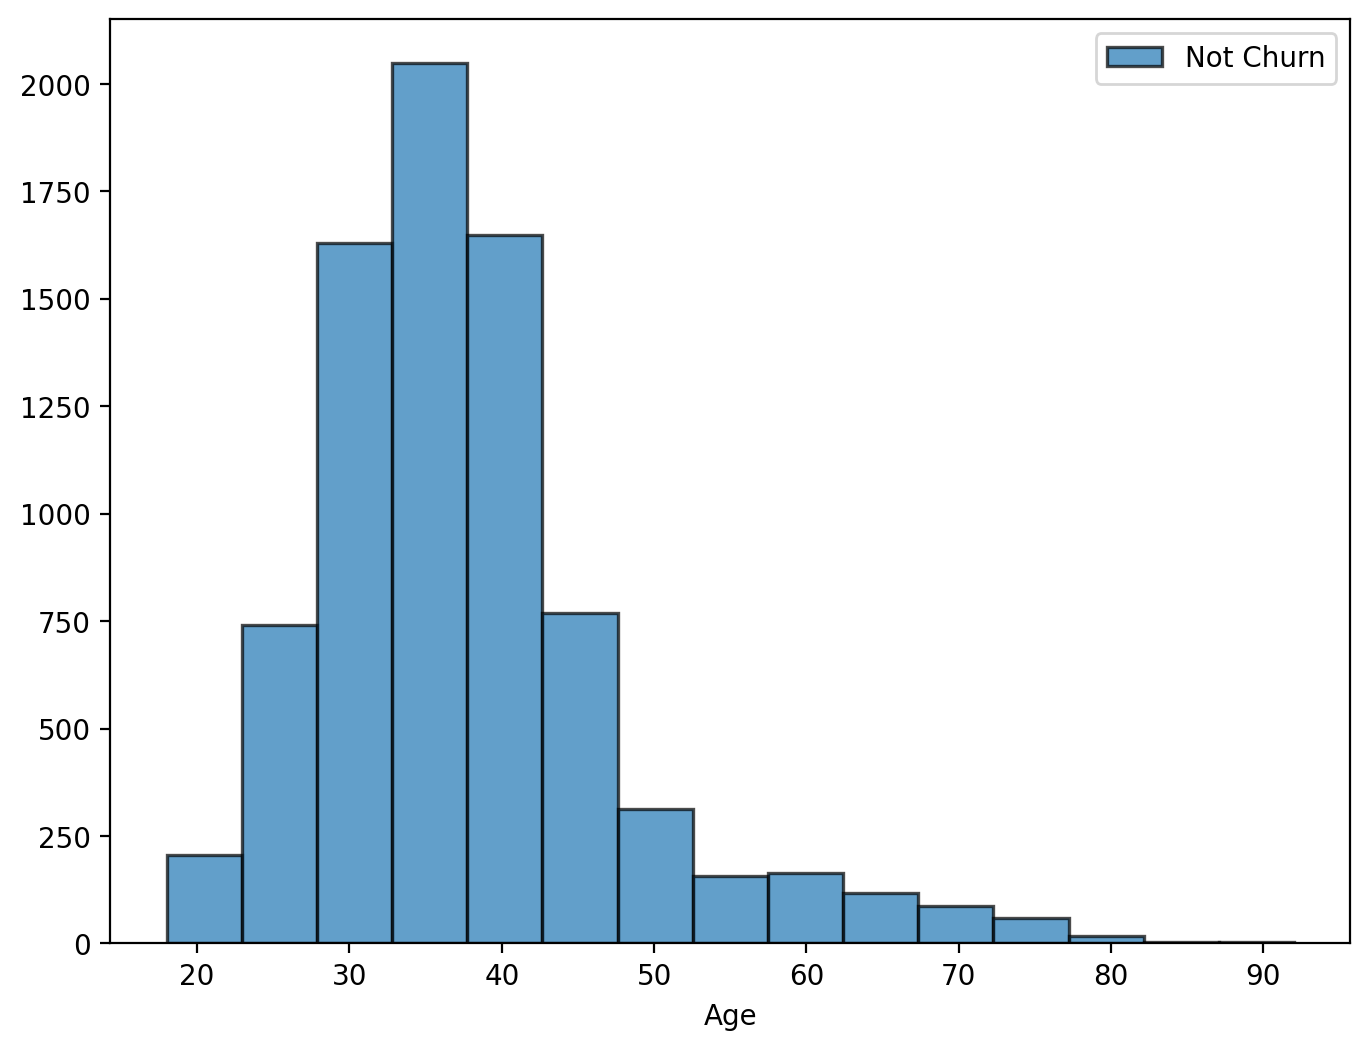

In [71]:
# Distribution of the Age for not_churn
plt.figure(figsize=(8, 6))
plt.hist(not_churn["Age"], bins=15, alpha=0.7, edgecolor='black', linewidth=1.2, label="Not Churn")
plt.xlabel("Age")
plt.legend()
plt.show()

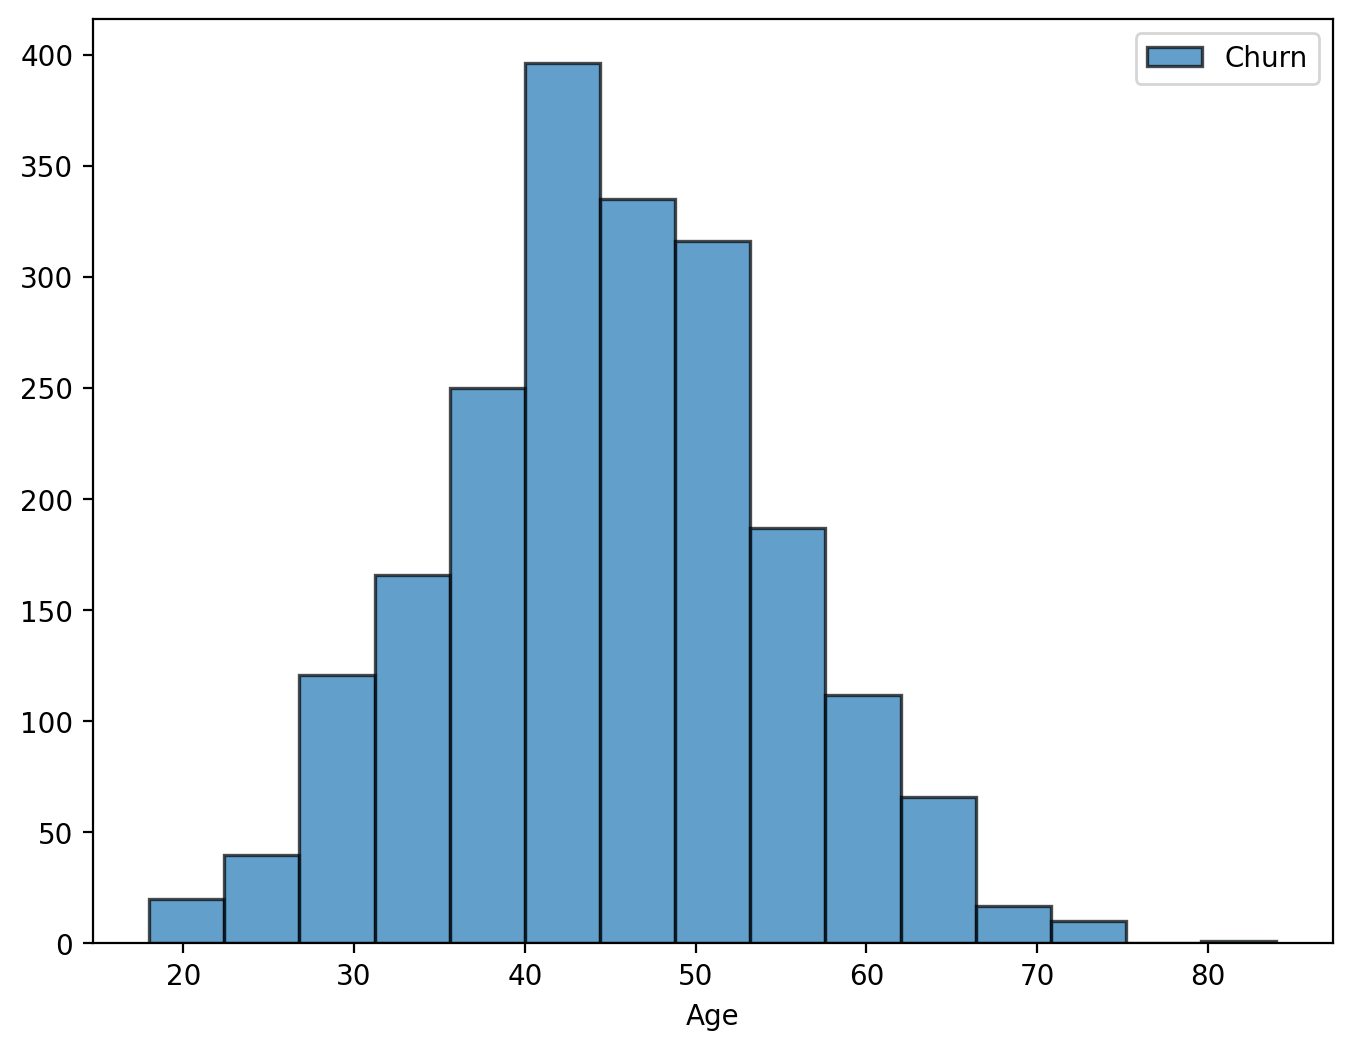

In [72]:
# Distribution of the Age for churn
plt.figure(figsize=(8, 6))
plt.hist(churn["Age"], bins=15, alpha=0.7, edgecolor='black', linewidth=1.2, label="Churn")
plt.xlabel("Age")
plt.legend()
plt.show()

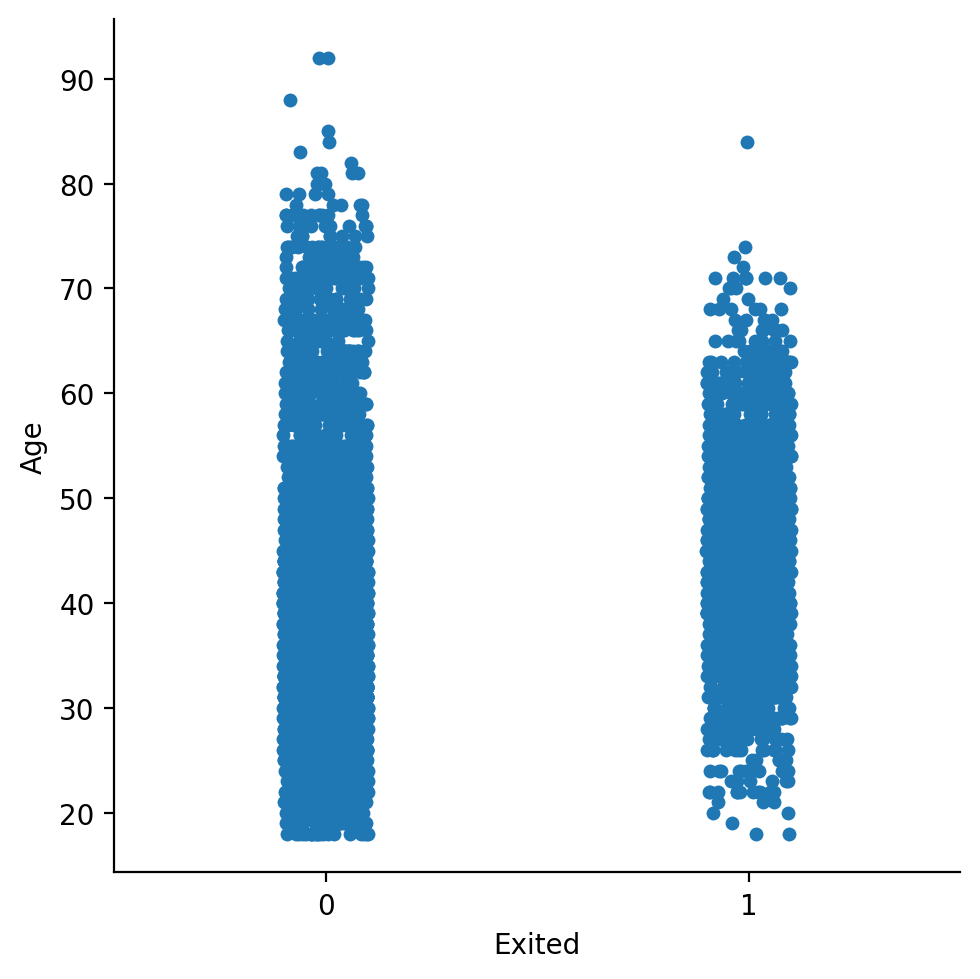

In [73]:
sns.catplot(data=df, x="Exited", y="Age")
plt.show()

#### Balance

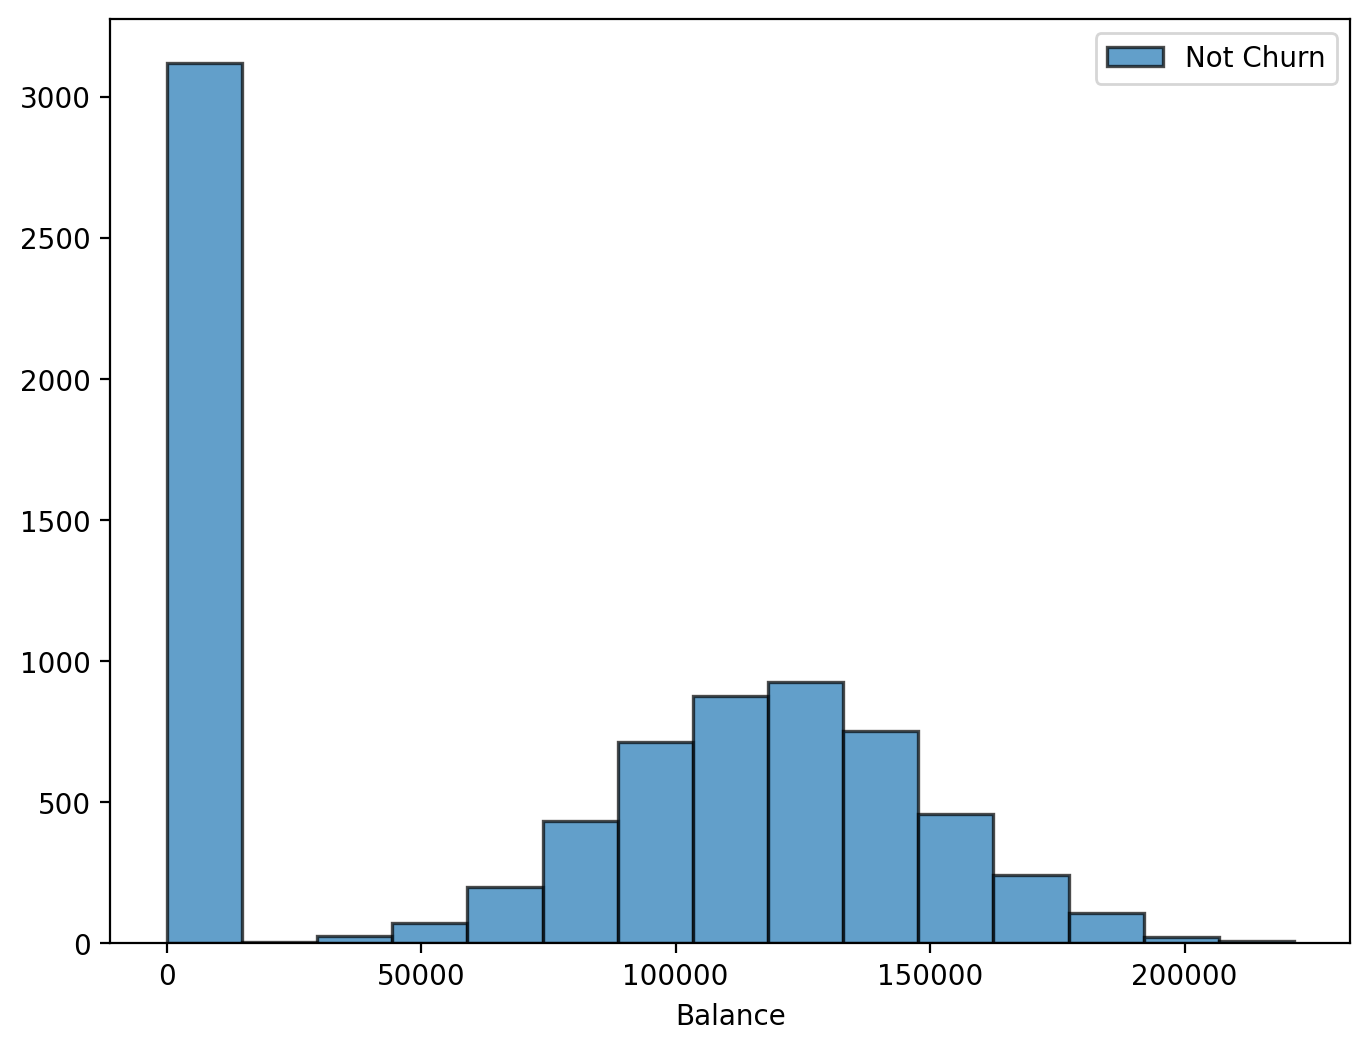

In [74]:
# Distribution of the Balance for not_churn
plt.figure(figsize=(8, 6))
plt.hist(not_churn["Balance"], bins=15, alpha=0.7, edgecolor='black', linewidth=1.2, label="Not Churn")
plt.xlabel("Balance")
plt.legend()
plt.show()

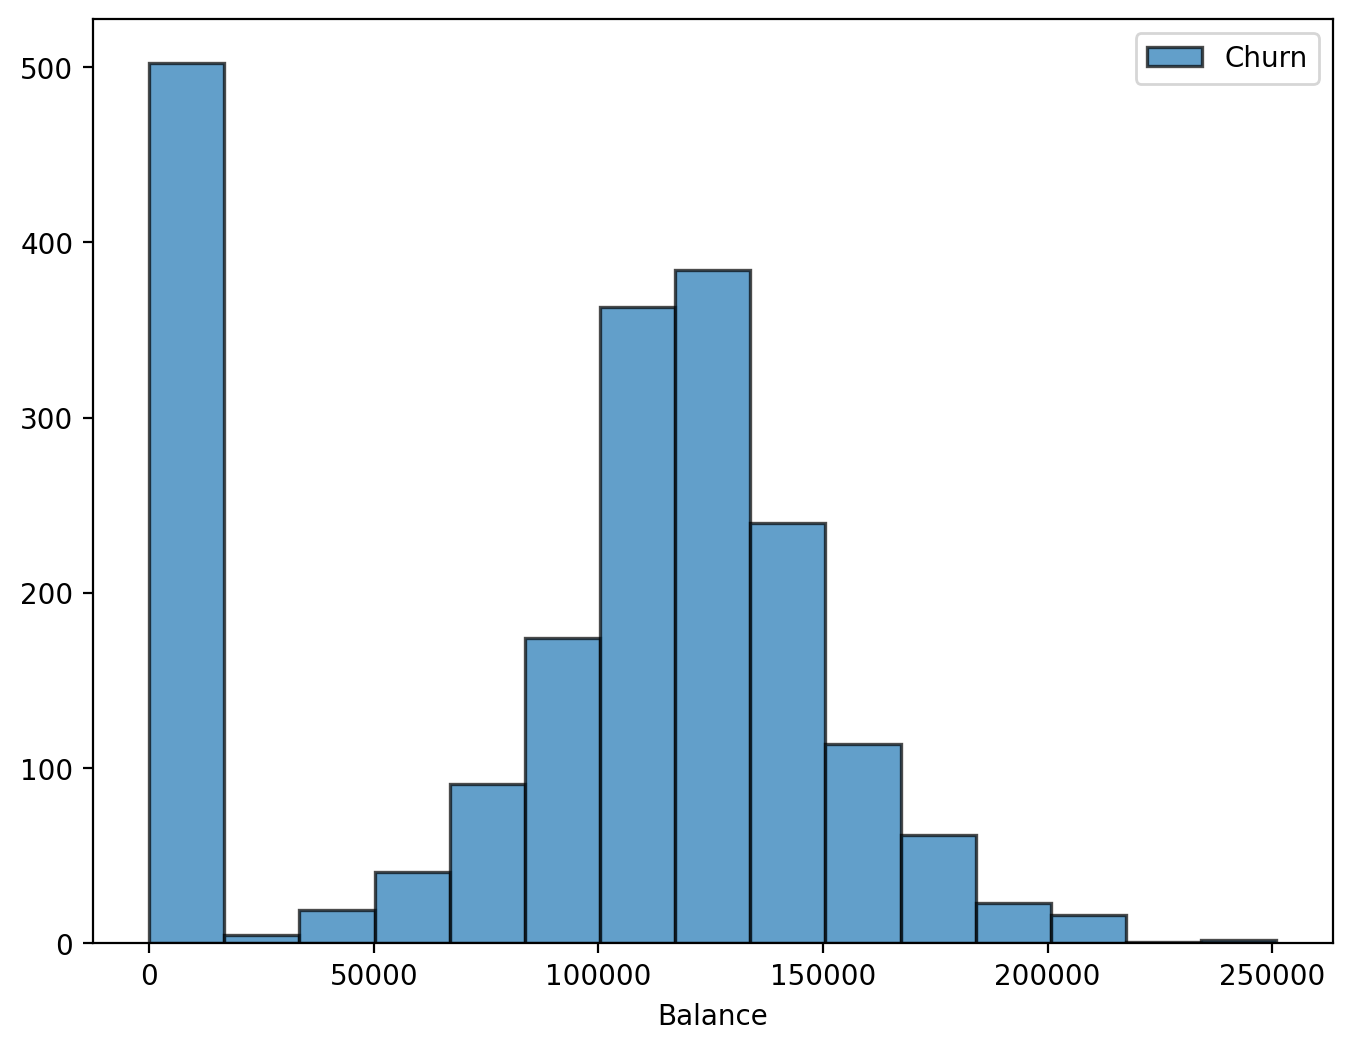

In [75]:
# Distribution of the Balance for churn
plt.figure(figsize=(8, 6))
plt.hist(churn["Balance"], bins=15, alpha=0.7, edgecolor='black', linewidth=1.2, label="Churn")
plt.xlabel("Balance")
plt.legend()
plt.show()

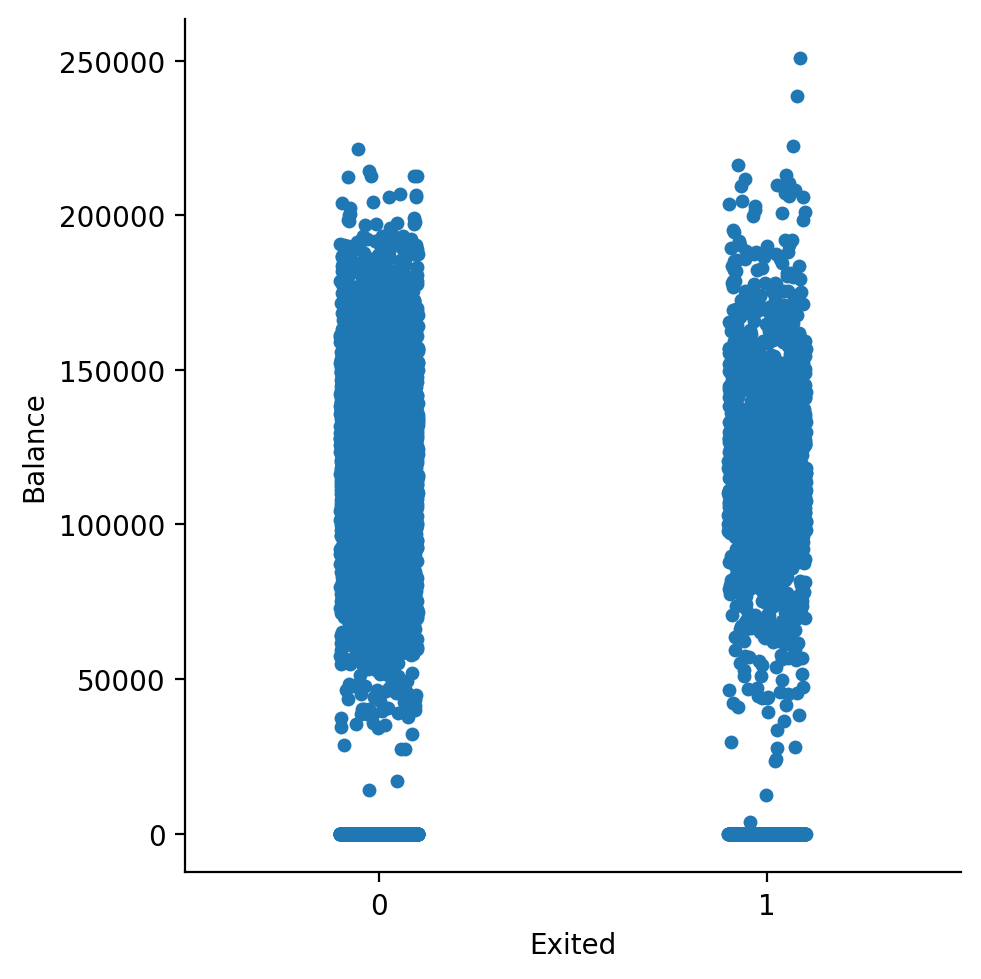

In [76]:
sns.catplot(data=df, x="Exited", y="Balance")
plt.show()

#### Correlation Matrix

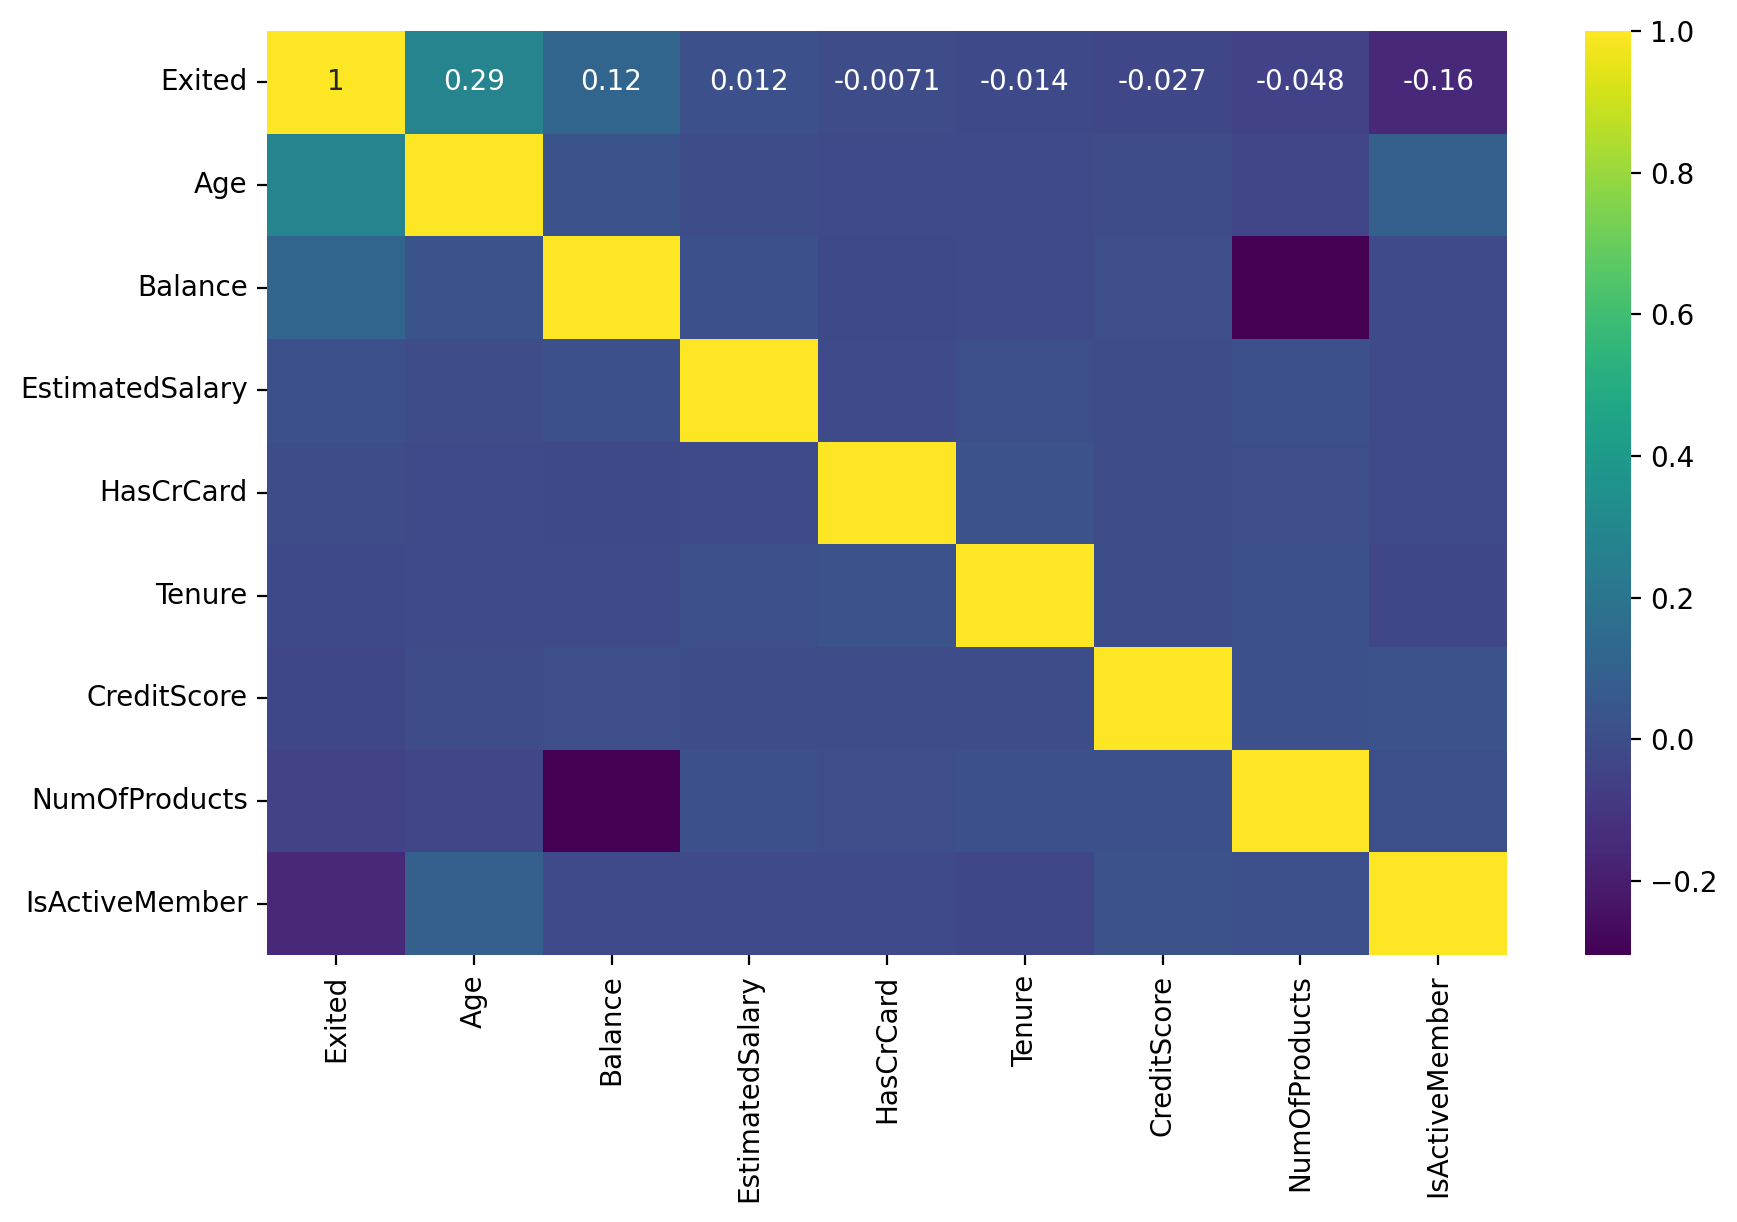

In [77]:
# Exited correlation matrix
k = 10 #number of variables for heatmap
numeric_df = df.drop(columns=['CustomerId', 'Surname', 'Geography', 'Gender'])
cols = numeric_df.corr().nlargest(k, "Exited")["Exited"].index
cm = numeric_df[cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap="viridis")
plt.show()

### Data Preprocessing

In [78]:
# Checking missing values
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [79]:
# Checking Outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    lower_limit = quantile_three - 1.5 * interquantile_range
    upper_limit = quantile_three + 1.5 * interquantile_range
    return lower_limit, upper_limit

def has_outliers(dataframe, numeric_columns, plot=False):
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            if plot:
                sns.boxplot(dataframe, x=dataframe[col])
                plt.show()

In [80]:
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

CustomerId has  None Outliers
CreditScore has  None Outliers
Age has  None Outliers
Tenure has  None Outliers
Balance has  None Outliers
NumOfProducts  :  60 outliers
NumOfProducts has  None Outliers
HasCrCard has  None Outliers
IsActiveMember has  None Outliers
EstimatedSalary has  None Outliers
Exited has  None Outliers


### Feature Engineering

In [81]:
df["NewTenure"] = df["Tenure"]/df["Age"]
df["NewCreditsScore"] = pd.qcut(df["CreditScore"], 6, labels=[1,2,3,4,5,6])
df["NewAgeScore"] = pd.qcut(df["Age"], 8, labels=[1,2,3,4,5,6,7,8])
df["NewBalanceScore"] = pd.qcut(df["Balance"].rank(method="first"), 5, labels=[1,2,3,4,5])
df["NewEstSalaryScore"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [82]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore
RowNumber,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4


In [83]:
# Applying One Hot Encoding to Categorial variables
df = pd.get_dummies(df, columns=["Gender", "Geography"], dtype=int)

In [84]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6,1,0,1,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6,1,0,0,0,1
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6,1,0,1,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5,1,0,1,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4,1,0,0,0,1


### Scalling

In [85]:
# Removing variables that will not affect the dependent variable
df = df.drop(["CustomerId","Surname"], axis = 1)

In [88]:
# Scaling features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [89]:
new_cols_ohe = ["Gender_Female", "Gender_Male", "Geography_France", "Geography_Germany","Geography_Spain"]
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) <= 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe and col not in "Exited" and col not in like_num]

for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

In [90]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,,,,,,
1,-0.246,0.417,-0.75,-0.761,1,1,1,0.012,1,-0.217,3,6,1,6,1,0,1,0,0
2,-0.328,0.333,-1.00,-0.105,1,0,1,0.126,0,-0.279,2,6,3,6,1,0,0,0,1
3,-1.119,0.417,0.75,0.489,3,1,0,0.140,1,0.164,1,6,5,6,1,0,1,0,0
4,0.351,0.167,-1.00,-0.761,2,0,0,-0.065,0,-0.276,5,5,1,5,1,0,1,0,0
5,1.478,0.500,-0.75,0.222,1,1,1,-0.215,0,-0.220,6,6,4,4,1,0,0,0,1
